In [1]:
from openmmtools.constants import kB
from simtk import unit
import numpy as np
from tqdm import tqdm
from IPython.core.display import display, HTML
from IPython.display import SVG
from rdkit.Chem.Draw import IPythonConsole
import mdtraj as md
import nglview
from rdkit import Chem
from rdkit.Chem import AllChem
import neutromeratio
import matplotlib.pyplot as plt
import pickle
import torchani
import torch

In [21]:
exp_results = pickle.load(open('../data/exp_results.pickle', 'rb'))

# specify the system you want to simulate
name = 'molDWRow_298'
#name = 'molDWRow_37'
#name = 'molDWRow_45'
#name = 'molDWRow_160'
#name = 'molDWRow_590'


from_mol_tautomer_idx = 2
to_mol_tautomer_idx = 1


t1_smiles = exp_results[name]['t1-smiles']
t2_smiles = exp_results[name]['t2-smiles']

# generate both rdkit mol
mols = { 't1' : neutromeratio.generate_rdkit_mol(t1_smiles), 't2' : neutromeratio.generate_rdkit_mol(t2_smiles) }
from_mol = mols[f"t{from_mol_tautomer_idx}"]
to_mol = mols[f"t{to_mol_tautomer_idx}"]
ani_input = neutromeratio.from_mol_to_ani_input(from_mol)

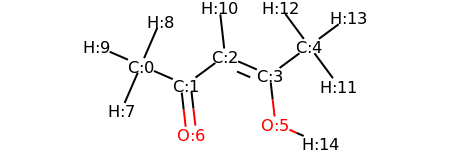

In [22]:
neutromeratio.display_mol(mols['t2'])

In [23]:
run = 1
topology = md.load(f"../data/md_sampling/{name}/{name}_t{from_mol_tautomer_idx}.pdb").topology
traj_file = f"../data/md_sampling/{name}/{name}_t{from_mol_tautomer_idx}_run{run}_anicxx.dcd"
traj = md.load(traj_file, top=topology)

view = nglview.show_mdtraj(traj[::10])
view

NGLWidget(count=10001)

Mean: 0.10087119042873383


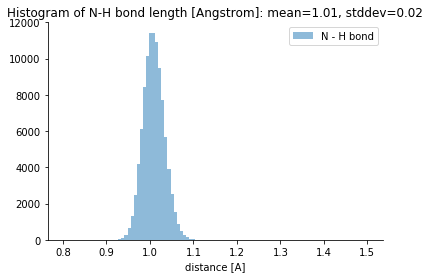

In [20]:
# plot bonds

import mdtraj as md
import numpy as np
import matplotlib.pylab as plt

traj_list = []
name = 'molDWRow_298'

l = md.compute_distances(traj, np.array([[8, 15]], np.int32))
plt.hist(l[1::] * 10,linewidth=0.5, bins=np.linspace(0.8, 1.5, 100), alpha=0.5, label='N - H bond')
print('Mean: {}'.format(np.mean(l)))


ax = plt.subplot(1,1,1)

plt.xlabel('distance [A]')

ax.set_title('Histogram of N-H bond length [Angstrom]: mean={:4.2f}, stddev={:4.2f}'.format(np.mean(l) * 10, np.std(l) * 10))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()

#plt.savefig('test_angles_vs_iterations_ni1ccx_2_0.png', dpi=300, bbox_inches='tight')
plt.show()
